In [1]:
!echo "training_set cats: "
!echo `ls -alh './dog_vs_cat/dataset/training_set/cats' | grep cat | wc -l`
!echo "training_set dogs: "
!echo `ls -alh './dog_vs_cat/dataset/training_set/dogs' | grep dog | wc -l`
!echo "test_set cats: "
!echo `ls -alh './dog_vs_cat/dataset/test_set/cats' | grep cat | wc -l`
!echo "test_set dogs: "
!echo `ls -alh './dog_vs_cat/dataset/test_set/dogs' | grep dog | wc -l`

/bin/bash: /home/xilm/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
training_set cats: 
/bin/bash: /home/xilm/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
4000
/bin/bash: /home/xilm/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
training_set dogs: 
/bin/bash: /home/xilm/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
4000
/bin/bash: /home/xilm/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
test_set cats: 
/bin/bash: /home/xilm/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
1000
/bin/bash: /home/xilm/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
test_set dogs: 
/bin/bash: /home/xilm/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
1000


In [64]:
import os, shutil

original_dataset_dir = './dog_vs_cat/dataset/'

base_dir = './play/'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'val')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)

train_cat_dir = os.path.join(train_dir, 'cat')
if not os.path.exists(train_cat_dir):
    os.mkdir(train_cat_dir)

train_dog_dir = os.path.join(train_dir, 'dog')
if not os.path.exists(train_dog_dir):
    os.mkdir(train_dog_dir)

validation_cat_dir = os.path.join(validation_dir, 'cat')
if not os.path.exists(validation_cat_dir):
    os.mkdir(validation_cat_dir)

validation_dog_dir = os.path.join(validation_dir, 'dog')
if not os.path.exists(validation_dog_dir):
    os.mkdir(validation_dog_dir)

test_cat_dir = os.path.join(test_dir, 'cat')
if not os.path.exists(test_cat_dir):
    os.mkdir(test_cat_dir)

test_dog_dir = os.path.join(test_dir, 'dog')
if not os.path.exists(test_dog_dir):
    os.mkdir(test_dog_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1,1001)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'training_set', 'cats', fname)
    dst = os.path.join(train_cat_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(4001,4501)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'test_set', 'cats', fname)
    dst = os.path.join(validation_cat_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(4501,5001)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'test_set', 'cats', fname)
    dst = os.path.join(test_cat_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1,1001)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'training_set', 'dogs', fname)
    dst = os.path.join(train_dog_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(4001,4501)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'test_set', 'dogs',fname)
    dst = os.path.join(validation_dog_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(4501,5001)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'test_set', 'dogs', fname)
    dst = os.path.join(test_dog_dir, fname)
    shutil.copyfile(src, dst)

In [65]:
print('total training cat images:', len(os.listdir(train_cat_dir)))
print('total validation cat images:', len(os.listdir(validation_cat_dir)))
print('total test cat images:', len(os.listdir(test_cat_dir)))
print('total training dog images:', len(os.listdir(train_dog_dir)))
print('total validation dog images:', len(os.listdir(validation_dog_dir)))
print('total test dog images:', len(os.listdir(test_dog_dir)))

total training cat images: 1000
total validation cat images: 500
total test cat images: 500
total training dog images: 1000
total validation dog images: 500
total test dog images: 500


In [66]:
from PIL import Image

path = './play/test/cat/cat.4501.jpg'
im = Image.open(path)
im.show()

In [67]:
from keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [68]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 17, 17, 128)     

In [69]:
from keras import optimizers

model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr=1e-4), metrics=['acc'])


/home/xilm/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [70]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150), batch_size=20, class_mode='binary'
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary'
)

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('label batch shape:', labels_batch.shape)
    break

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
data batch shape: (20, 150, 150, 3)
label batch shape: (20,)


In [71]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)

Epoch 1/30


/tmp/ipykernel_102541/4224276573.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)


100/100 [==============================] - 5s 43ms/step - loss: 0.6923 - acc: 0.5420 - val_loss: 0.6847 - val_acc: 0.5010
Epoch 2/30
100/100 [==============================] - 4s 41ms/step - loss: 0.6685 - acc: 0.6015 - val_loss: 0.6453 - val_acc: 0.6290
Epoch 3/30
100/100 [==============================] - 4s 41ms/step - loss: 0.6327 - acc: 0.6485 - val_loss: 0.6202 - val_acc: 0.6680
Epoch 4/30
100/100 [==============================] - 4s 41ms/step - loss: 0.5961 - acc: 0.6750 - val_loss: 0.5988 - val_acc: 0.6750
Epoch 5/30
100/100 [==============================] - 4s 40ms/step - loss: 0.5637 - acc: 0.7095 - val_loss: 0.5750 - val_acc: 0.6830
Epoch 6/30
100/100 [==============================] - 4s 41ms/step - loss: 0.5261 - acc: 0.7360 - val_loss: 0.5599 - val_acc: 0.7120
Epoch 7/30
100/100 [==============================] - 4s 41ms/step - loss: 0.5002 - acc: 0.7600 - val_loss: 0.5526 - val_acc: 0.7220
Epoch 8/30
100/100 [==============================] - 4s 41ms/step - loss: 0.469

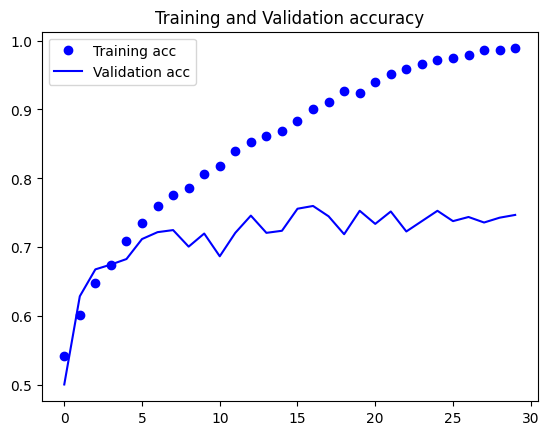

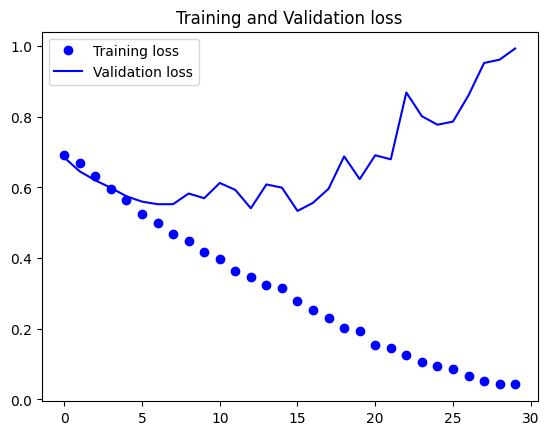

In [72]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [19]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [35]:
import keras.utils as image

fnames = [os.path.join(train_cat_dir, fname) for fname in os.listdir(train_cat_dir)]
# img_path = fnames[3]

# img = image.load_img(img_path, target_size=(150, 150))

# x = image.img_to_array(img)

# x = x.reshape((1,) + x.shape) # because batch equals 1

# i = 0
# for batch in datagen.flow(x, batch_size=1):
#     plt.figure(i)
#     imgplot = plt.imshow(image.array_to_img(batch[0]))
#     i += 1
#     if i % 4 == 0:
#         break

# plt.show()
for fname in fnames:
    img = image.load_img(fname, target_size=(150, 150))
    x = image.img_to_array(img)
    x = x.reshape((1,) + x.shape) # because batch equals 1
    
    i = 0
    for batch in datagen.flow(x, batch_size=1, save_to_dir=train_cat_dir, save_prefix='a'):
        i += 1
        if i % 4 == 0:
            break

In [36]:
fnames = [os.path.join(train_dog_dir, fname) for fname in os.listdir(train_dog_dir)]

for fname in fnames:
    img = image.load_img(fname, target_size=(150, 150))
    x = image.img_to_array(img)
    x = x.reshape((1,) + x.shape) # because batch equals 1
    
    i = 0
    for batch in datagen.flow(x, batch_size=1, save_to_dir=train_dog_dir):
        i += 1
        if i % 4 == 0:
            break

In [46]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # randomly dropout 50%
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 17, 17, 128)     

/home/xilm/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [60]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1./255) # Note that the validation data should not be augmented!

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [62]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=62,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=31
)

Epoch 1/100


/tmp/ipykernel_102541/459642905.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


62/62 [==============================] - 8s 129ms/step - loss: 0.5917 - acc: 0.6905 - val_loss: 0.6326 - val_acc: 0.6280
Epoch 2/100
62/62 [==============================] - 8s 129ms/step - loss: 0.5960 - acc: 0.6758 - val_loss: 0.5681 - val_acc: 0.7137
Epoch 3/100
62/62 [==============================] - 8s 129ms/step - loss: 0.5911 - acc: 0.6814 - val_loss: 0.5677 - val_acc: 0.7147
Epoch 4/100
62/62 [==============================] - 8s 134ms/step - loss: 0.5898 - acc: 0.6804 - val_loss: 0.5903 - val_acc: 0.6885
Epoch 5/100
62/62 [==============================] - 8s 132ms/step - loss: 0.5856 - acc: 0.6855 - val_loss: 0.6174 - val_acc: 0.6673
Epoch 6/100
62/62 [==============================] - 8s 129ms/step - loss: 0.5732 - acc: 0.7038 - val_loss: 0.5641 - val_acc: 0.7147
Epoch 7/100
62/62 [==============================] - 8s 129ms/step - loss: 0.5754 - acc: 0.6900 - val_loss: 0.5565 - val_acc: 0.7157
Epoch 8/100
62/62 [==============================] - 8s 131ms/step - loss: 0.5655

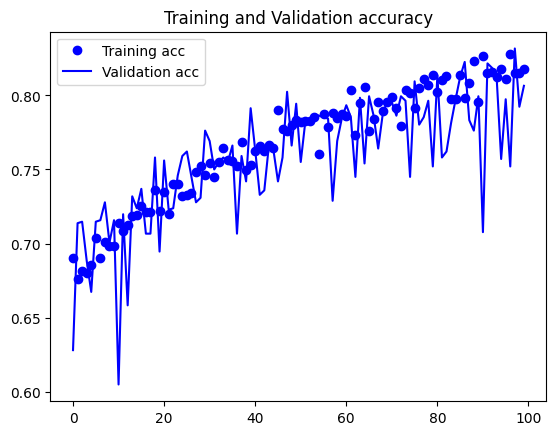

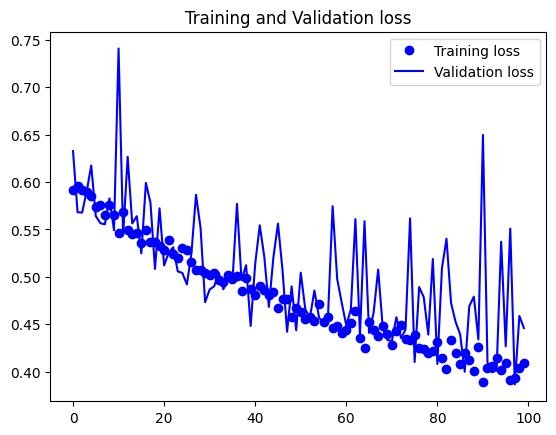

In [63]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()